# Record Creator

## Conditions

### Input
- A series of images, with a certain dimension
- The amount of desired images in a circle
- the size of the circle

### Output
- a record with all the images on

## Workflow

- create or supply a record image

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros((2048,2048,4), dtype=np.uint8)

cv2.circle(img, (1024,1024), 1024, [20,20,20,255], -1)

gray = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)

plt.imshow(gray)
plt.title('Record')
plt.show()

cv2.imwrite("output/disk.png", img)



error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Scalar value for argument 'color' is not numeric
>  - Scalar value for argument 'color' is not numeric


In [7]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [17]:
from skimage.io import imread_collection

#your path 
col_dir = 'rawData/*.png'

#creating a collection with the available images
col = imread_collection(col_dir)

nrOfImages = len(col)

for i in range(nrOfImages):
    
    





32


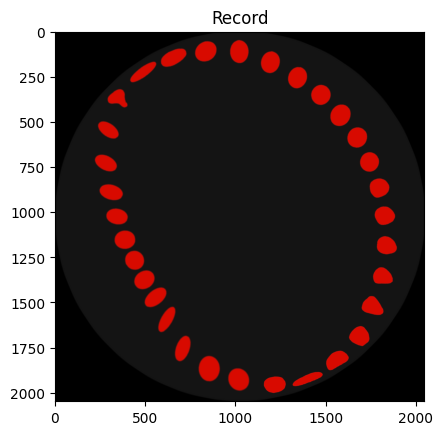

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('output/disk.png')
overlay_t = cv2.imread('rawData/PieSlice-1.png',-1) # -1 loads with transparency

def overlay_transparent(background_img, img_to_overlay_t, x, y, overlay_size=None):
	"""
	@brief      Overlays a transparant PNG onto another image using CV2
	
	@param      background_img    The background image
	@param      img_to_overlay_t  The transparent image to overlay (has alpha channel)
	@param      x                 x location to place the top-left corner of our overlay
	@param      y                 y location to place the top-left corner of our overlay
	@param      overlay_size      The size to scale our overlay to (tuple), no scaling if None
	
	@return     Background image with overlay on top
	"""
	
	bg_img = background_img.copy()
	
	if overlay_size is not None:
		img_to_overlay_t = cv2.resize(img_to_overlay_t.copy(), overlay_size)

	# Extract the alpha mask of the RGBA image, convert to RGB 
	b,g,r,a = cv2.split(img_to_overlay_t)
	overlay_color = cv2.merge((b,g,r))
	
	# Apply some simple filtering to remove edge noise
	mask = cv2.medianBlur(a,5)

	h, w, _ = overlay_color.shape
	roi = bg_img[y:y+h, x:x+w]

	# Black-out the area behind the logo in our original ROI
	img1_bg = cv2.bitwise_and(roi.copy(),roi.copy(),mask = cv2.bitwise_not(mask))
	
	# Mask out the logo from the logo image.
	img2_fg = cv2.bitwise_and(overlay_color,overlay_color,mask = mask)

	# Update the original image with our new ROI
	bg_img[y:y+h, x:x+w] = cv2.add(img1_bg, img2_fg)

	return bg_img

from skimage.io import imread_collection

#your path 
col_dir = 'rawData/*.png'

#creating a collection with the available images
col = imread_collection(col_dir)

nrOfImages = len(col)

for i in range(nrOfImages):

	img = overlay_transparent(img, col[i], 1024-256, 1024)
	img = rotate_image(img,360.0/nrOfImages)

plt.imshow(img)
plt.title('Record')
plt.show()

In [9]:
cv2.imwrite("output/animationRecord.png", img)


True

In [13]:

import imageio

image_lst = []

for i in range(nrOfImages):

    image_lst.append(img)
    img = rotate_image(img,360.0/nrOfImages)

imageio.mimsave('output/video.gif', image_lst, duration=41.66)

[240, 240, 240, 255]


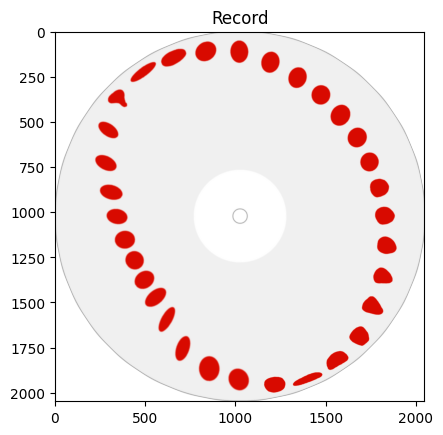

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import recordcreator as rc
from skimage.io import imread_collection

#your path 
col_dir = 'rawData/*.png'
#creating a collection with the available images
col = imread_collection(col_dir)

img = rc.create_blank_record(2048, (240,240,240))

result = rc.place_pies(img, col)

plt.imshow(result)
plt.title('Record')
plt.show()



[20, 20, 20, 255]


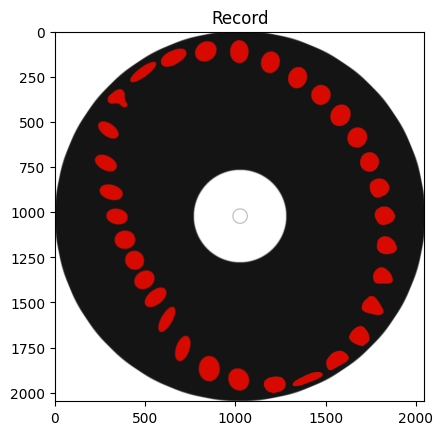

In [3]:
import recordcreator as rc
from matplotlib import pyplot as plt

record = rc.create_animated_record('rawData/*.png')

plt.imshow(record)
plt.title('Record')
plt.show()

In [ ]:
cv2.imwrite("output/disk.png", img)

import imageio

image_lst = []
for i in range(nrOfImages):
    image_lst.append(img)
    img = rotate_image(img,360.0/nrOfImages)
imageio.mimsave('output/video.gif', image_lst, duration=41.66)